In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [37]:
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [38]:
from sklearn.metrics import classification_report, r2_score

In [39]:
df= pd.read_csv("human.csv")
df.head(3)

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1


In [40]:
df.isnull().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

In [41]:
df.shape

(1215745, 14)

In [42]:
df.duplicated().sum()

0

In [50]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 567725 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alx       567725 non-null  float64
 1   aly       567725 non-null  float64
 2   alz       567725 non-null  float64
 3   glx       567725 non-null  float64
 4   gly       567725 non-null  float64
 5   glz       567725 non-null  float64
 6   arx       567725 non-null  float64
 7   ary       567725 non-null  float64
 8   arz       567725 non-null  float64
 9   grx       567725 non-null  float64
 10  gry       567725 non-null  float64
 11  grz       567725 non-null  float64
 12  Activity  567725 non-null  int64  
 13  subject   567725 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 65.0+ MB


# Removing Outliers


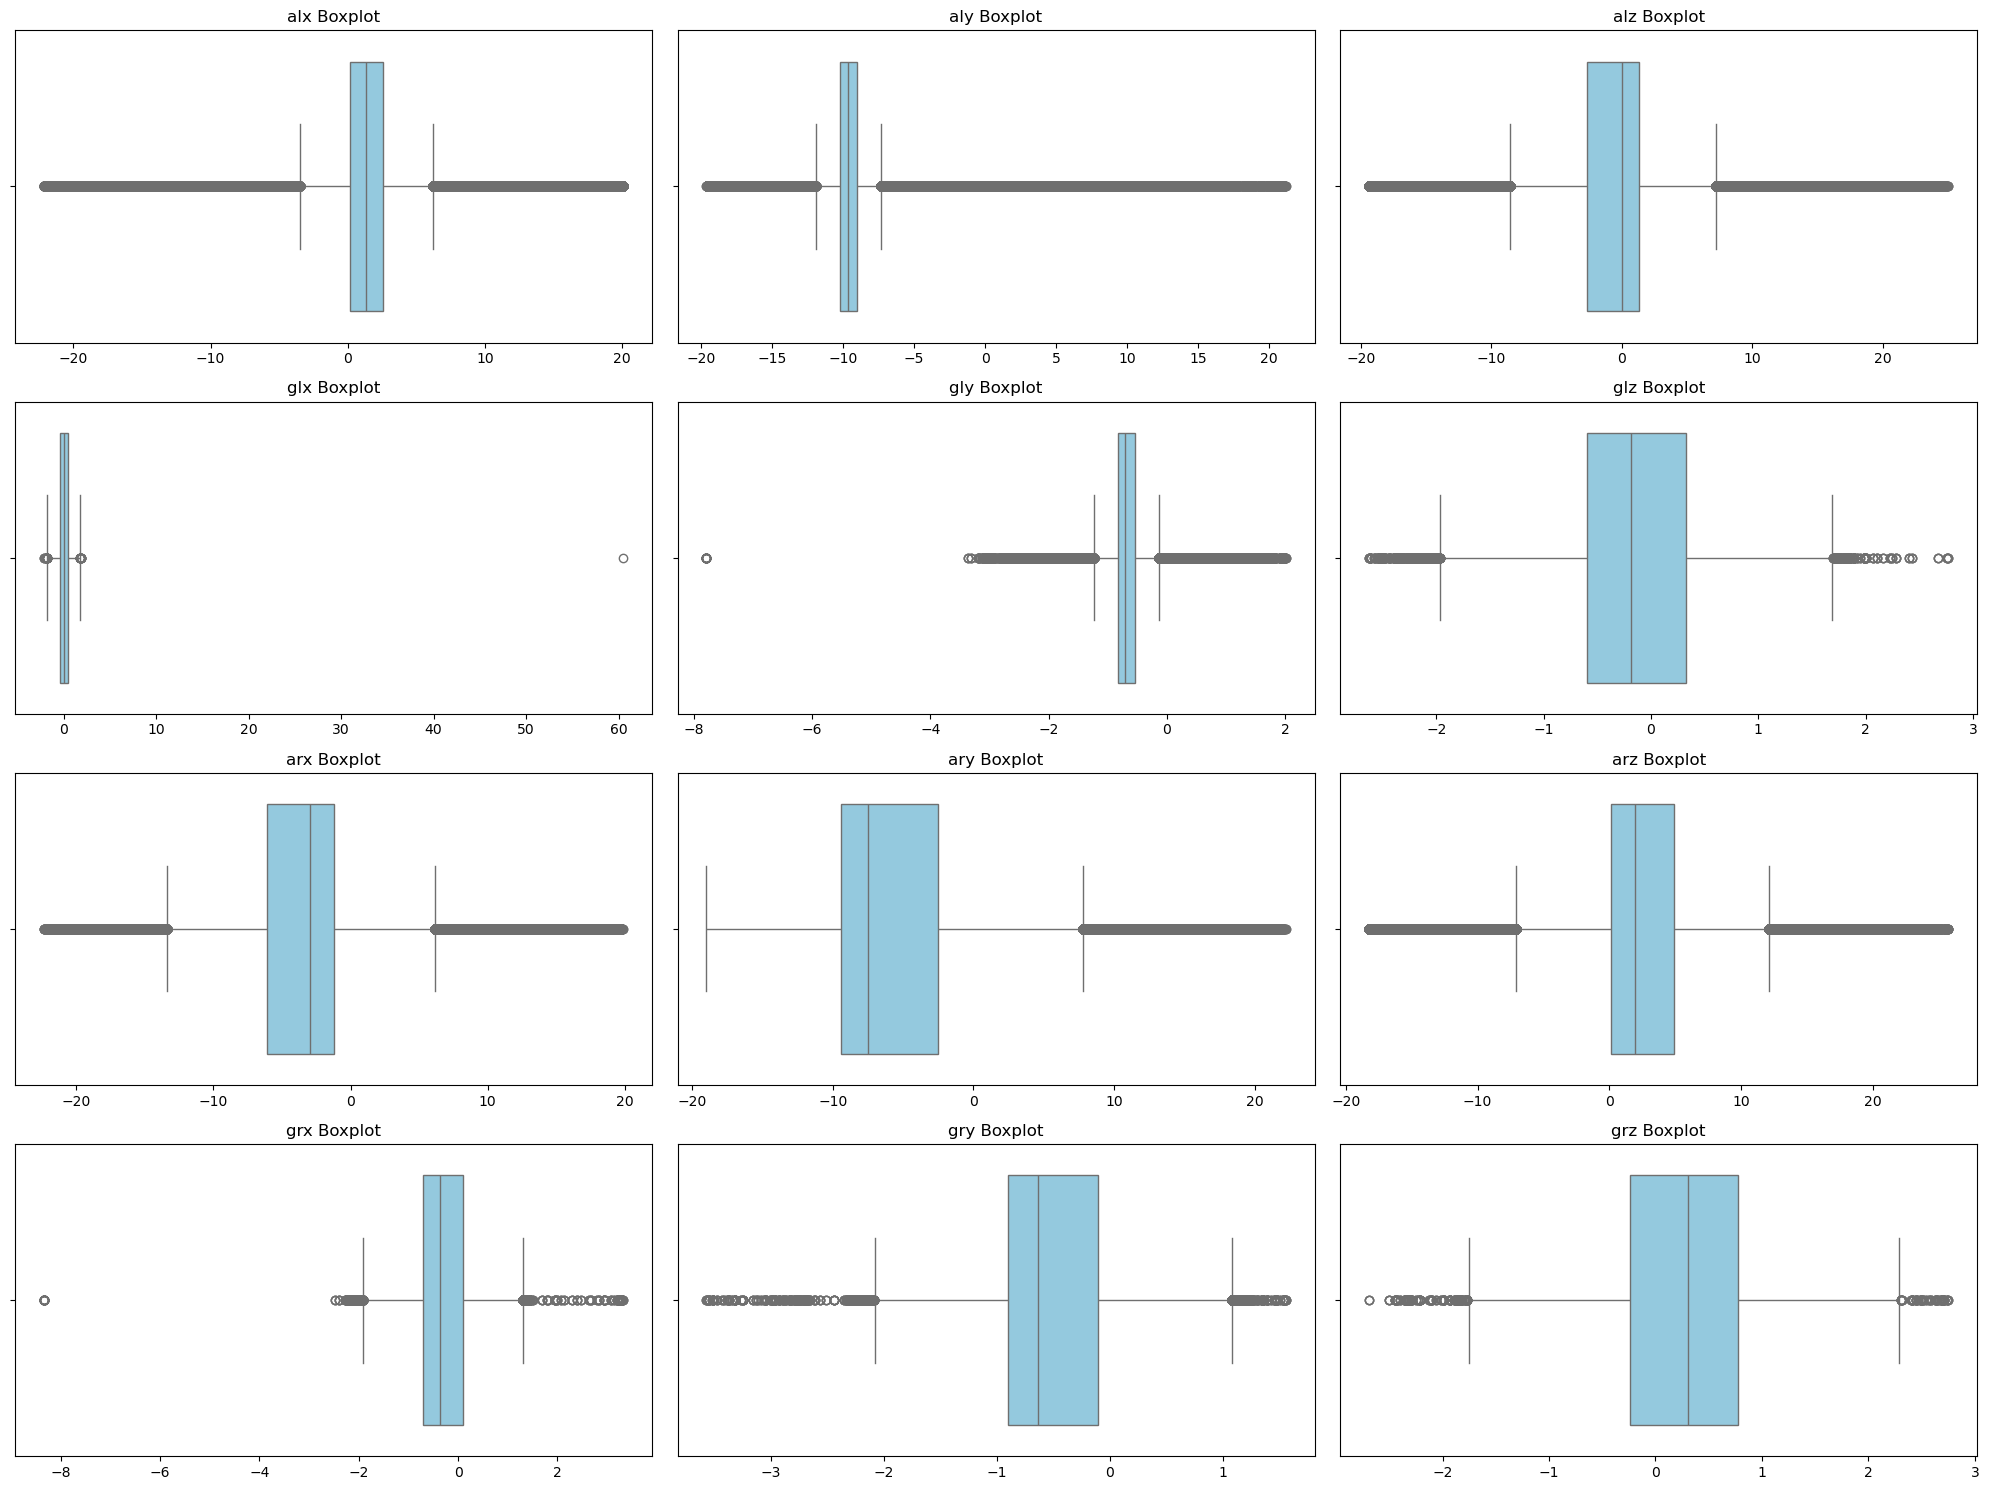

In [44]:
plt.figure(figsize=(20, 15))


numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns[:-1]


for i, column in enumerate(numeric_cols, 1):  # i starts at 1
    plt.subplot(4, 3, i)  # 4 rows, 3 columns, position i
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'{column} Boxplot')
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [45]:
def remove_outliers_iqr(data, exclude_cols=[]):
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    numeric_cols = [col for col in numeric_cols if col not in exclude_cols]
    
    filtered_df = data.copy()
    for col in numeric_cols:
        Q1 = filtered_df[col].quantile(0.25)
        Q3 = filtered_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        filtered_df = filtered_df[(filtered_df[col] >= lower) & (filtered_df[col] <= upper)]
    
    return filtered_df

In [46]:
df = remove_outliers_iqr(df, exclude_cols=['Activity', 'subject'])

In [47]:
df.head(5)

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


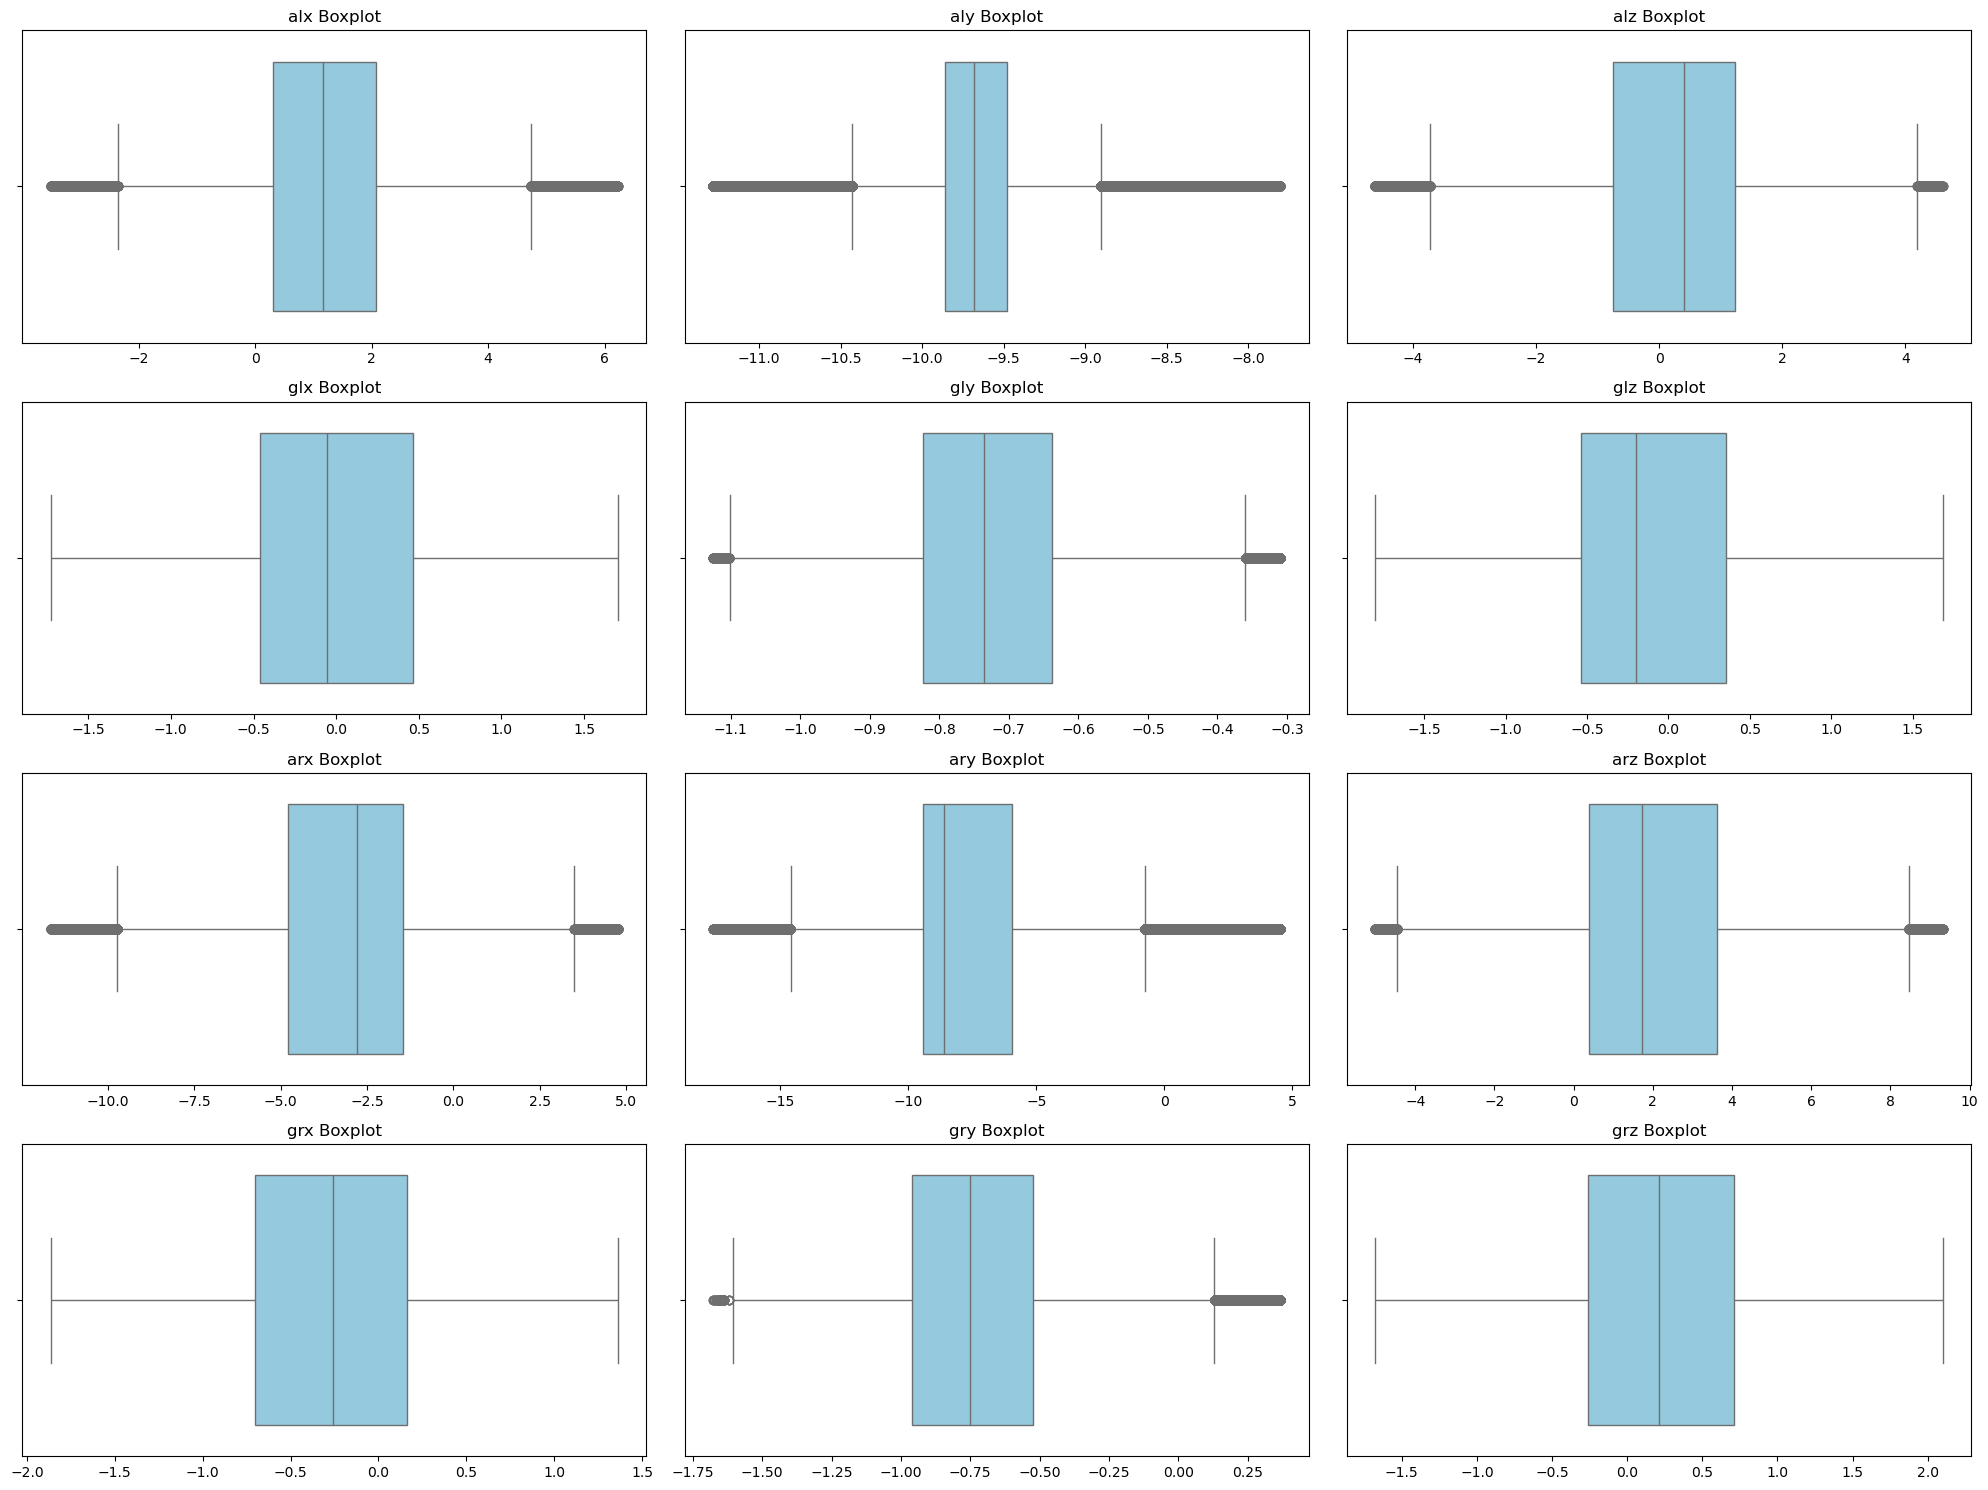

In [48]:
plt.figure(figsize=(20, 15))

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns[:-1]


for i, column in enumerate(numeric_cols, 1):  # i starts at 1
    plt.subplot(4, 3, i) 
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'{column} Boxplot')
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [49]:
df.shape

(567725, 14)

# Feature Scaling

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
feature_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop(['Activity'])

In [53]:
scaler = StandardScaler()

In [54]:
df[feature_cols] = scaler.fit_transform(df[feature_cols])

In [55]:
df.head(3)

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,0.763135,-0.053981,0.326214,0.229948,-0.857905,-1.171483,-1.782211,0.760511,-0.715438,-0.404618,-0.917967,-0.326873,0,subject1
1,0.913535,0.338563,0.359350,0.192442,-0.844151,-1.163480,-1.774817,0.832692,-0.775586,-0.404618,-0.917967,-0.326873,0,subject1
2,0.929117,0.214996,0.357629,0.192442,-0.844151,-1.163480,-1.734549,0.844597,-0.683211,-0.404618,-0.917967,-0.326873,0,subject1


In [57]:
df.shape

(567725, 14)

<Axes: xlabel='Activity'>

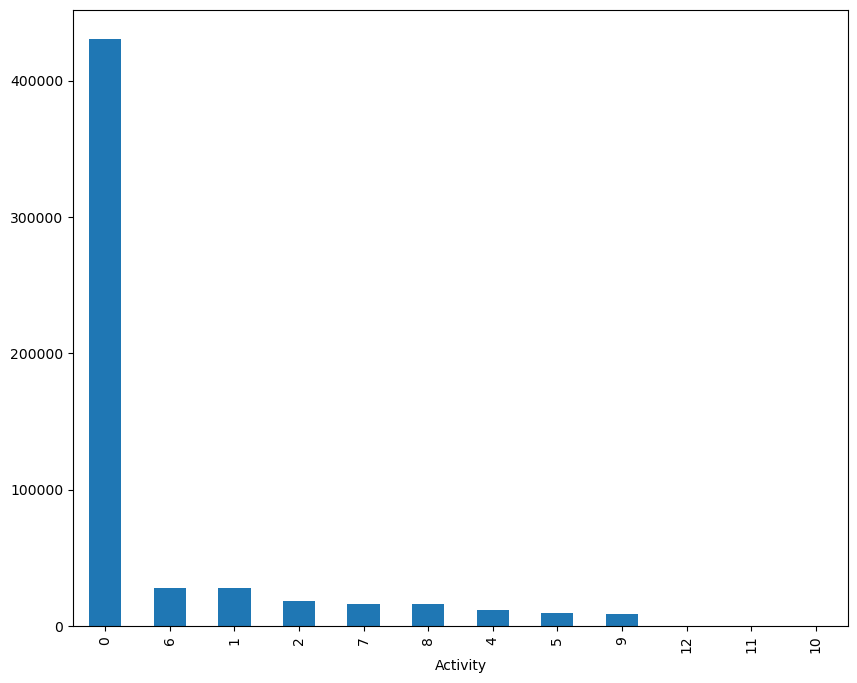

In [60]:
plt.figure(figsize=(10,8))
df['Activity'].value_counts().plot.bar()

In [62]:
data_activity_0 = df[df["Activity"] == 0]
data_activity_else = df[df["Activity"] != 0]


In [63]:
data_activity_0 = data_activity_0.sample(n=40000)
df = pd.concat([data_activity_0, data_activity_else])


<Axes: xlabel='Activity'>

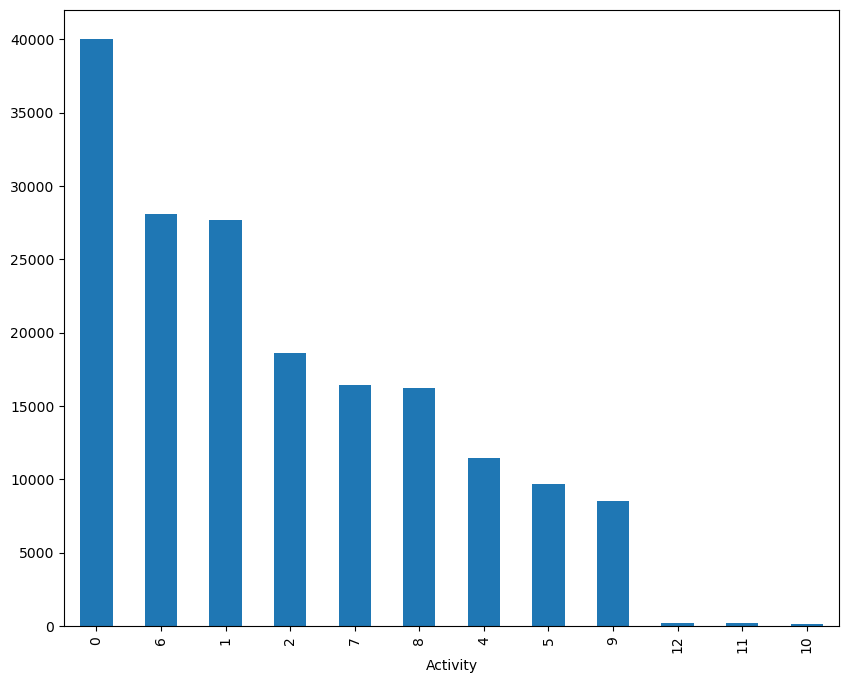

In [64]:
plt.figure(figsize=(10,8))
df['Activity'].value_counts().plot.bar()